In [1]:
%load_ext autoreload
%autoreload 2
from pathlib import Path

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.signal as spsig

from pasna_analysis import DataLoader, Experiment, utils

experiment_name = '20240919_25C'
# Use the list below to exclude embryos from the experiment.
# Add embryo ids to the list (based on csv file name).
to_exclude = []

exp_path = Path.cwd().parent.joinpath('data',experiment_name)
exp = Experiment(DataLoader(exp_path), first_peak_threshold=0, to_exclude=to_exclude, dff_strategy='local_minima')

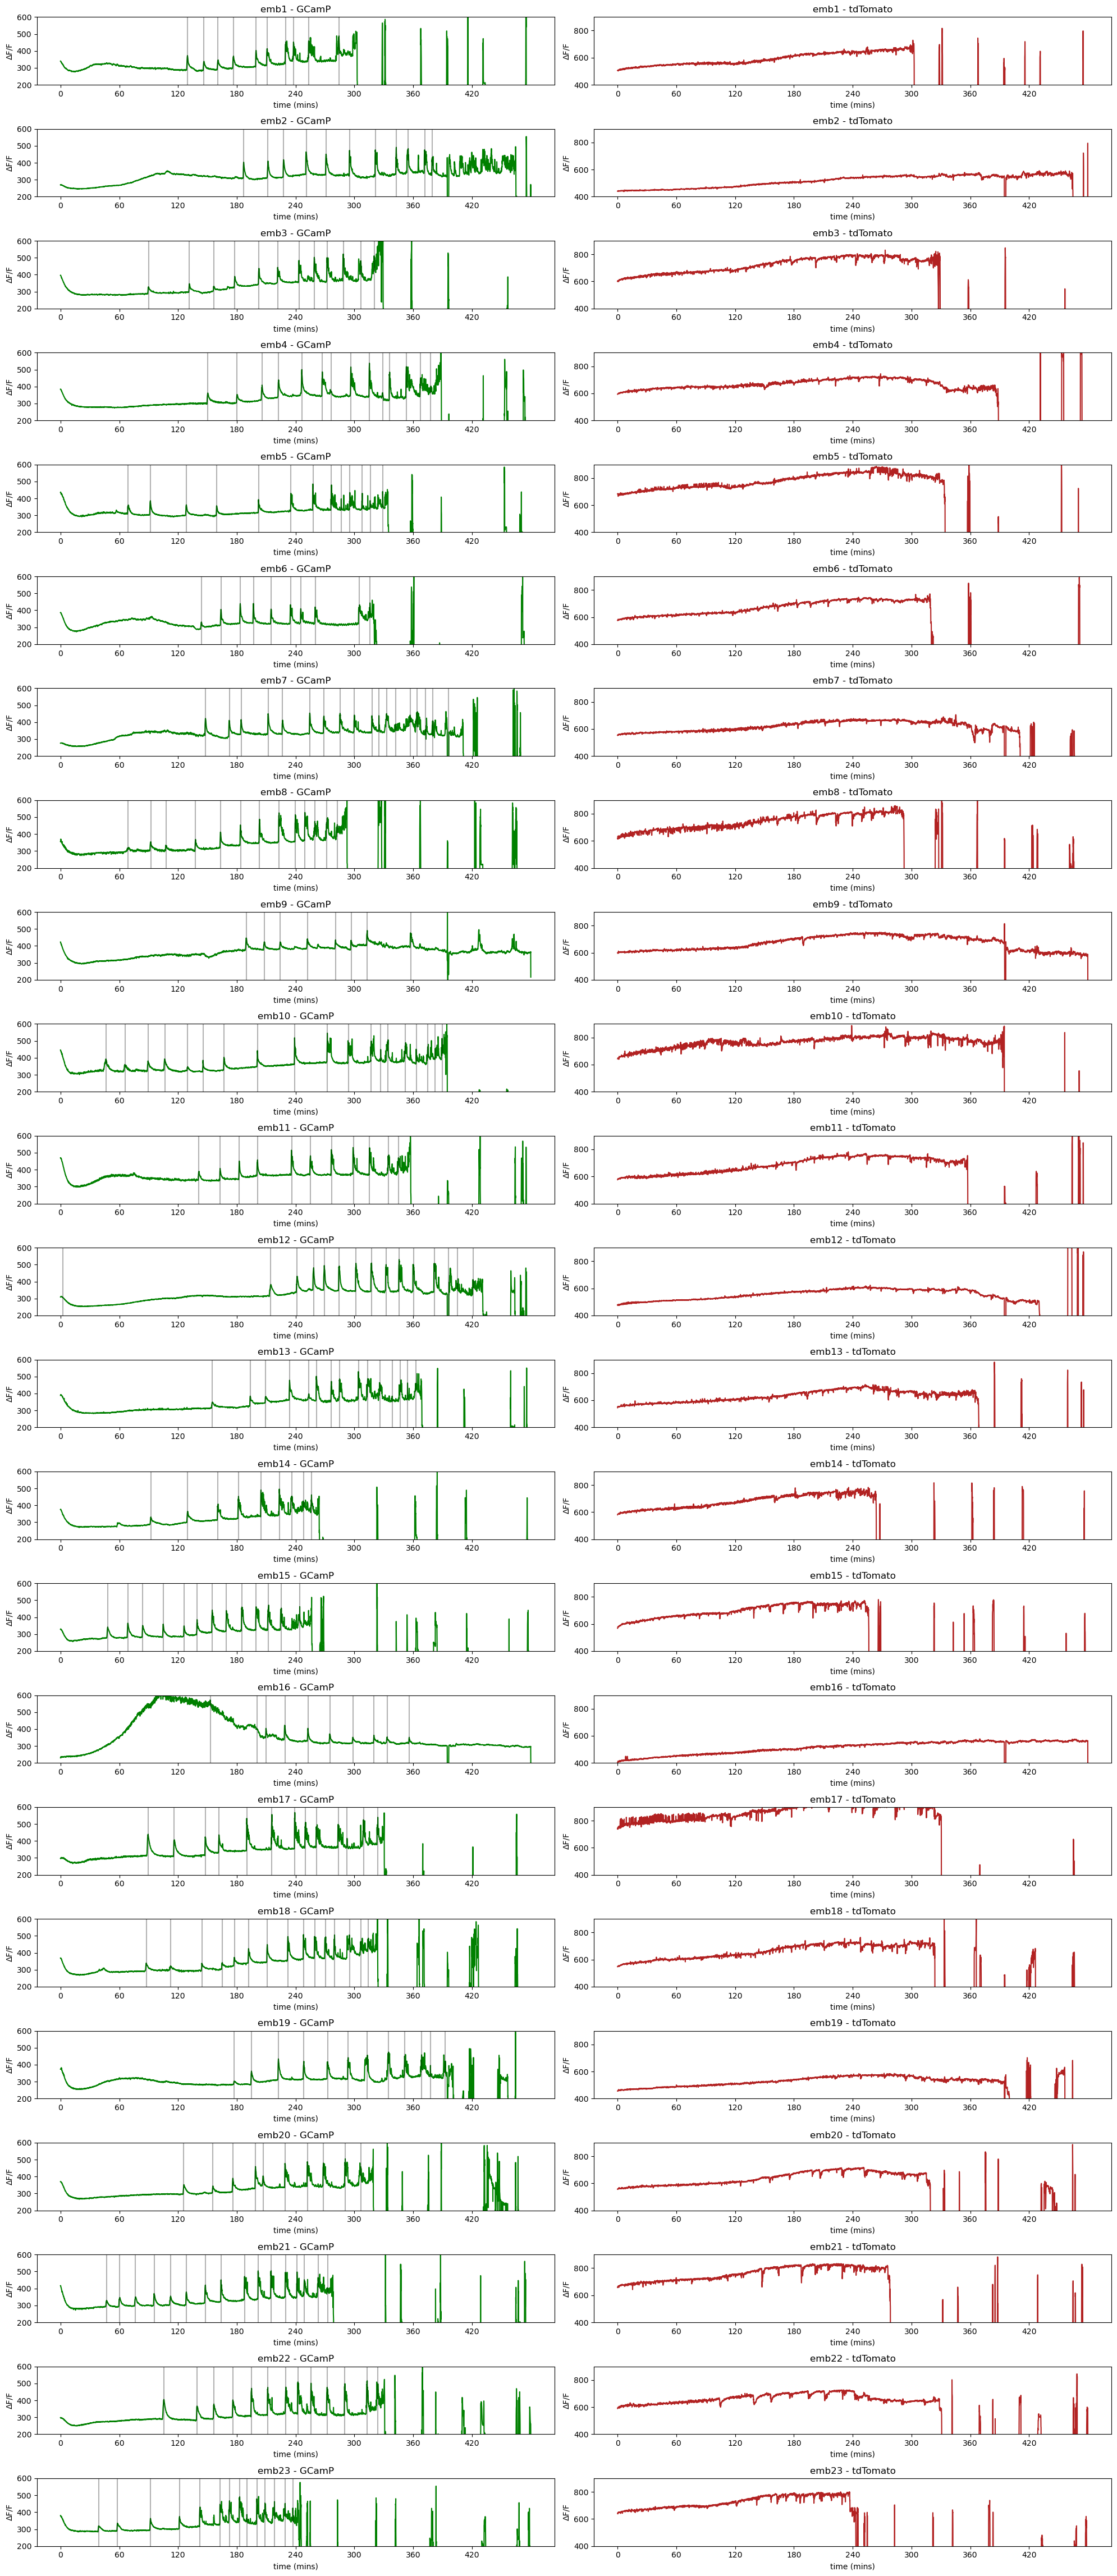

In [10]:
'''Plots activity signals for a group of embryos.'''
# change start and end to select different groups
start =  0
end = len(exp.embryos)

fig, axes = plt.subplots(end-start, 2, figsize=(20, 2*(end-start)))

for (left, right), emb in zip(axes, exp.embryos[start:end]):
    # plot data
    time = emb.activity[:, 0] / 60
    trace = exp.traces[emb.name]
    left.plot(time, trace.active, color='green')
    right.plot(time, trace.struct, color='firebrick')

    # set title/labels
    left.set_title(f'{emb.name} - GCamP')
    left.set_ylabel('ΔF/F')
    left.set_xlabel('time (mins)')
    right.set_title(f'{emb.name} - tdTomato')
    right.set_ylabel('ΔF/F')
    right.set_xlabel('time (mins)')

    # set y axis bounds (comment out if you want it to autoscale)
    left.set_ylim([200,600])
    right.set_ylim([400,900])

    # set tick marks
    x_points = utils.time_scale_list(max(time))
    left.set_xticks(x_points)
    right.set_xticks(x_points)

    # mark identified peaks
    for peak in trace.peak_times:
        peak_in_mins = peak / 60
        left.axvline(peak_in_mins, color='k', alpha=0.3)

plt.tight_layout()

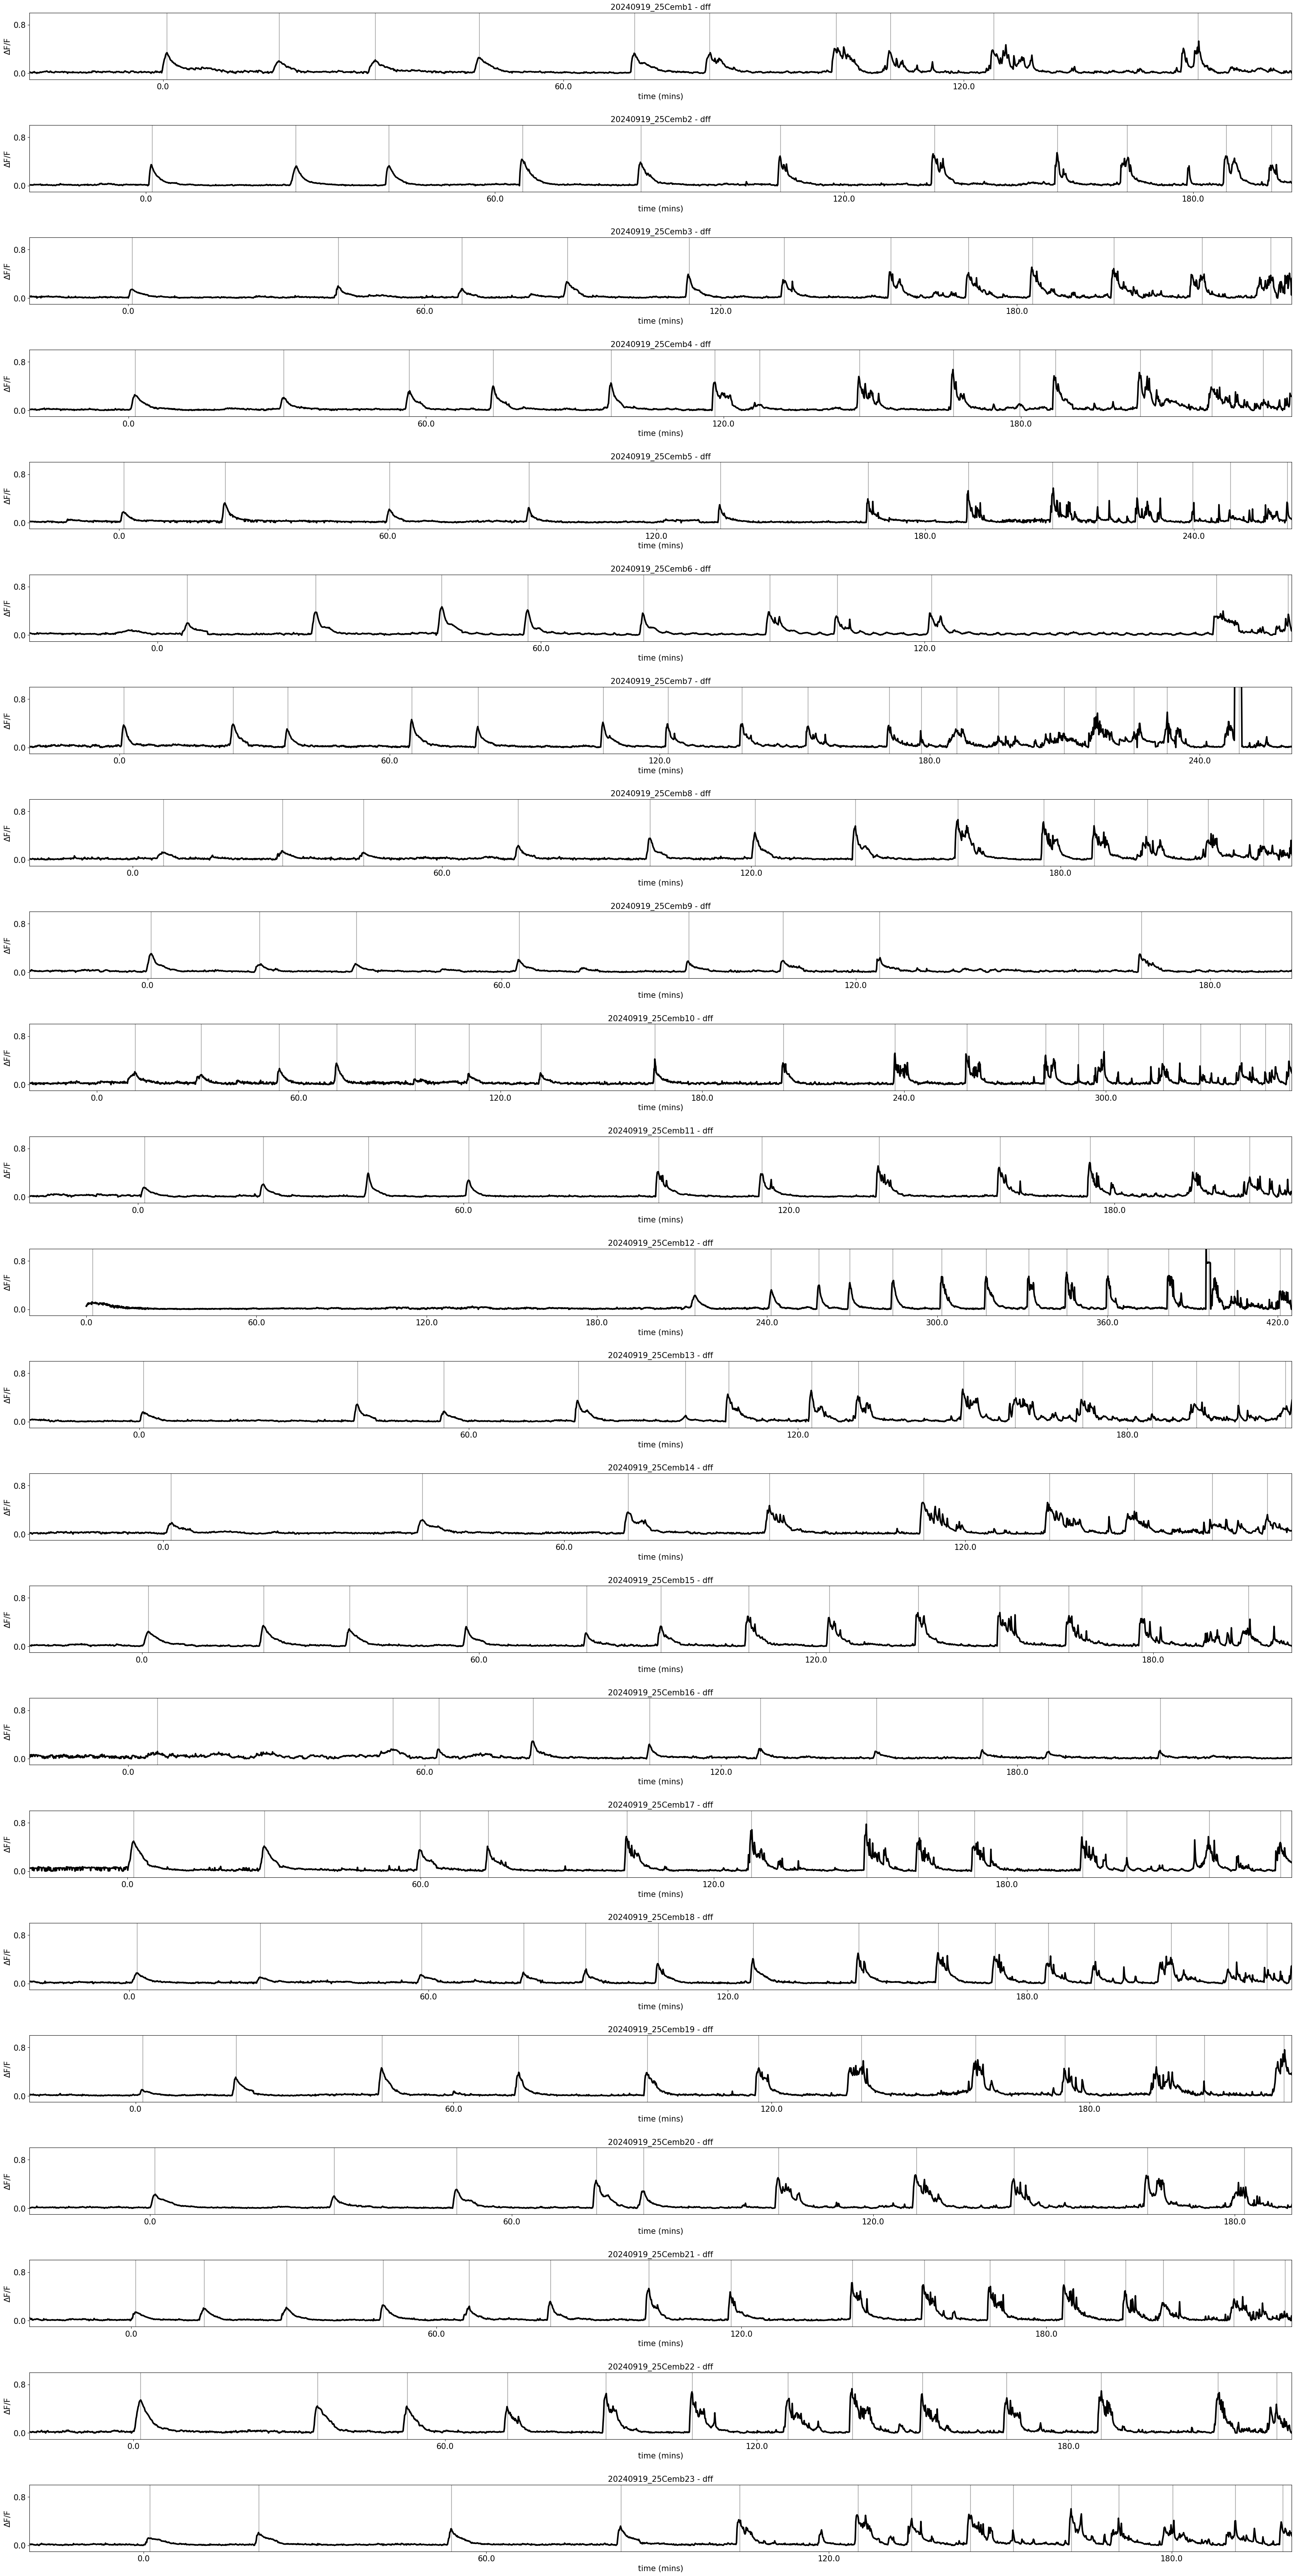

In [34]:
'''Plots dff for a group of embryos.'''
# change start and end to select different groups
start = 0
end = len(exp.embryos)

fig, axes = plt.subplots(end-start, figsize=(35, 3*(end-start)))
axes = axes.flatten()
for ax, emb in zip(axes, exp.embryos[start:end]):
    # plot data
    time = emb.activity[:, 0] / 60
    trace = exp.traces[emb.name]
    ax.plot(time, trace.dff, linewidth=3, color='k')

    # set title/labels
    fontsize = 15
    ax.tick_params(axis='both', which='major', labelsize=fontsize)

    ax.set_title(f'{exp.name}{emb.name} - dff', fontsize=fontsize)
    ax.set_ylabel('ΔF/F', fontsize=fontsize)
    ax.set_xlabel('time (mins)', fontsize=fontsize)
    
    # x axis - trim to before onset & at hatching
    start = round(time[trace.peak_bounds_indices[0][0]])
    end_time = trace.time[trace.trim_idx]/60
    ax.set_xlim(start - 20, end_time) # start plotting 20 mins before hatching

    # x axis - adjust tick labels to make the start time 0
    hours = np.arange(start, end_time, 60)
    ax.set_xticks(hours)
    labels = np.arange(0, end_time-start, 60)
    ax.set_xticklabels(labels)
    ax.tick_params(axis='both', which='major', labelsize=fontsize)

    # y axis - trim & tick labels
    ax.set_ylim(-0.1, 1)
    ax.set_yticks([0, 0.8])
    
    for peak in trace.peak_times:
        peak_in_mins = peak / 60
        ax.axvline(peak_in_mins, color='k', alpha=0.3)

plt.tight_layout(pad=3)

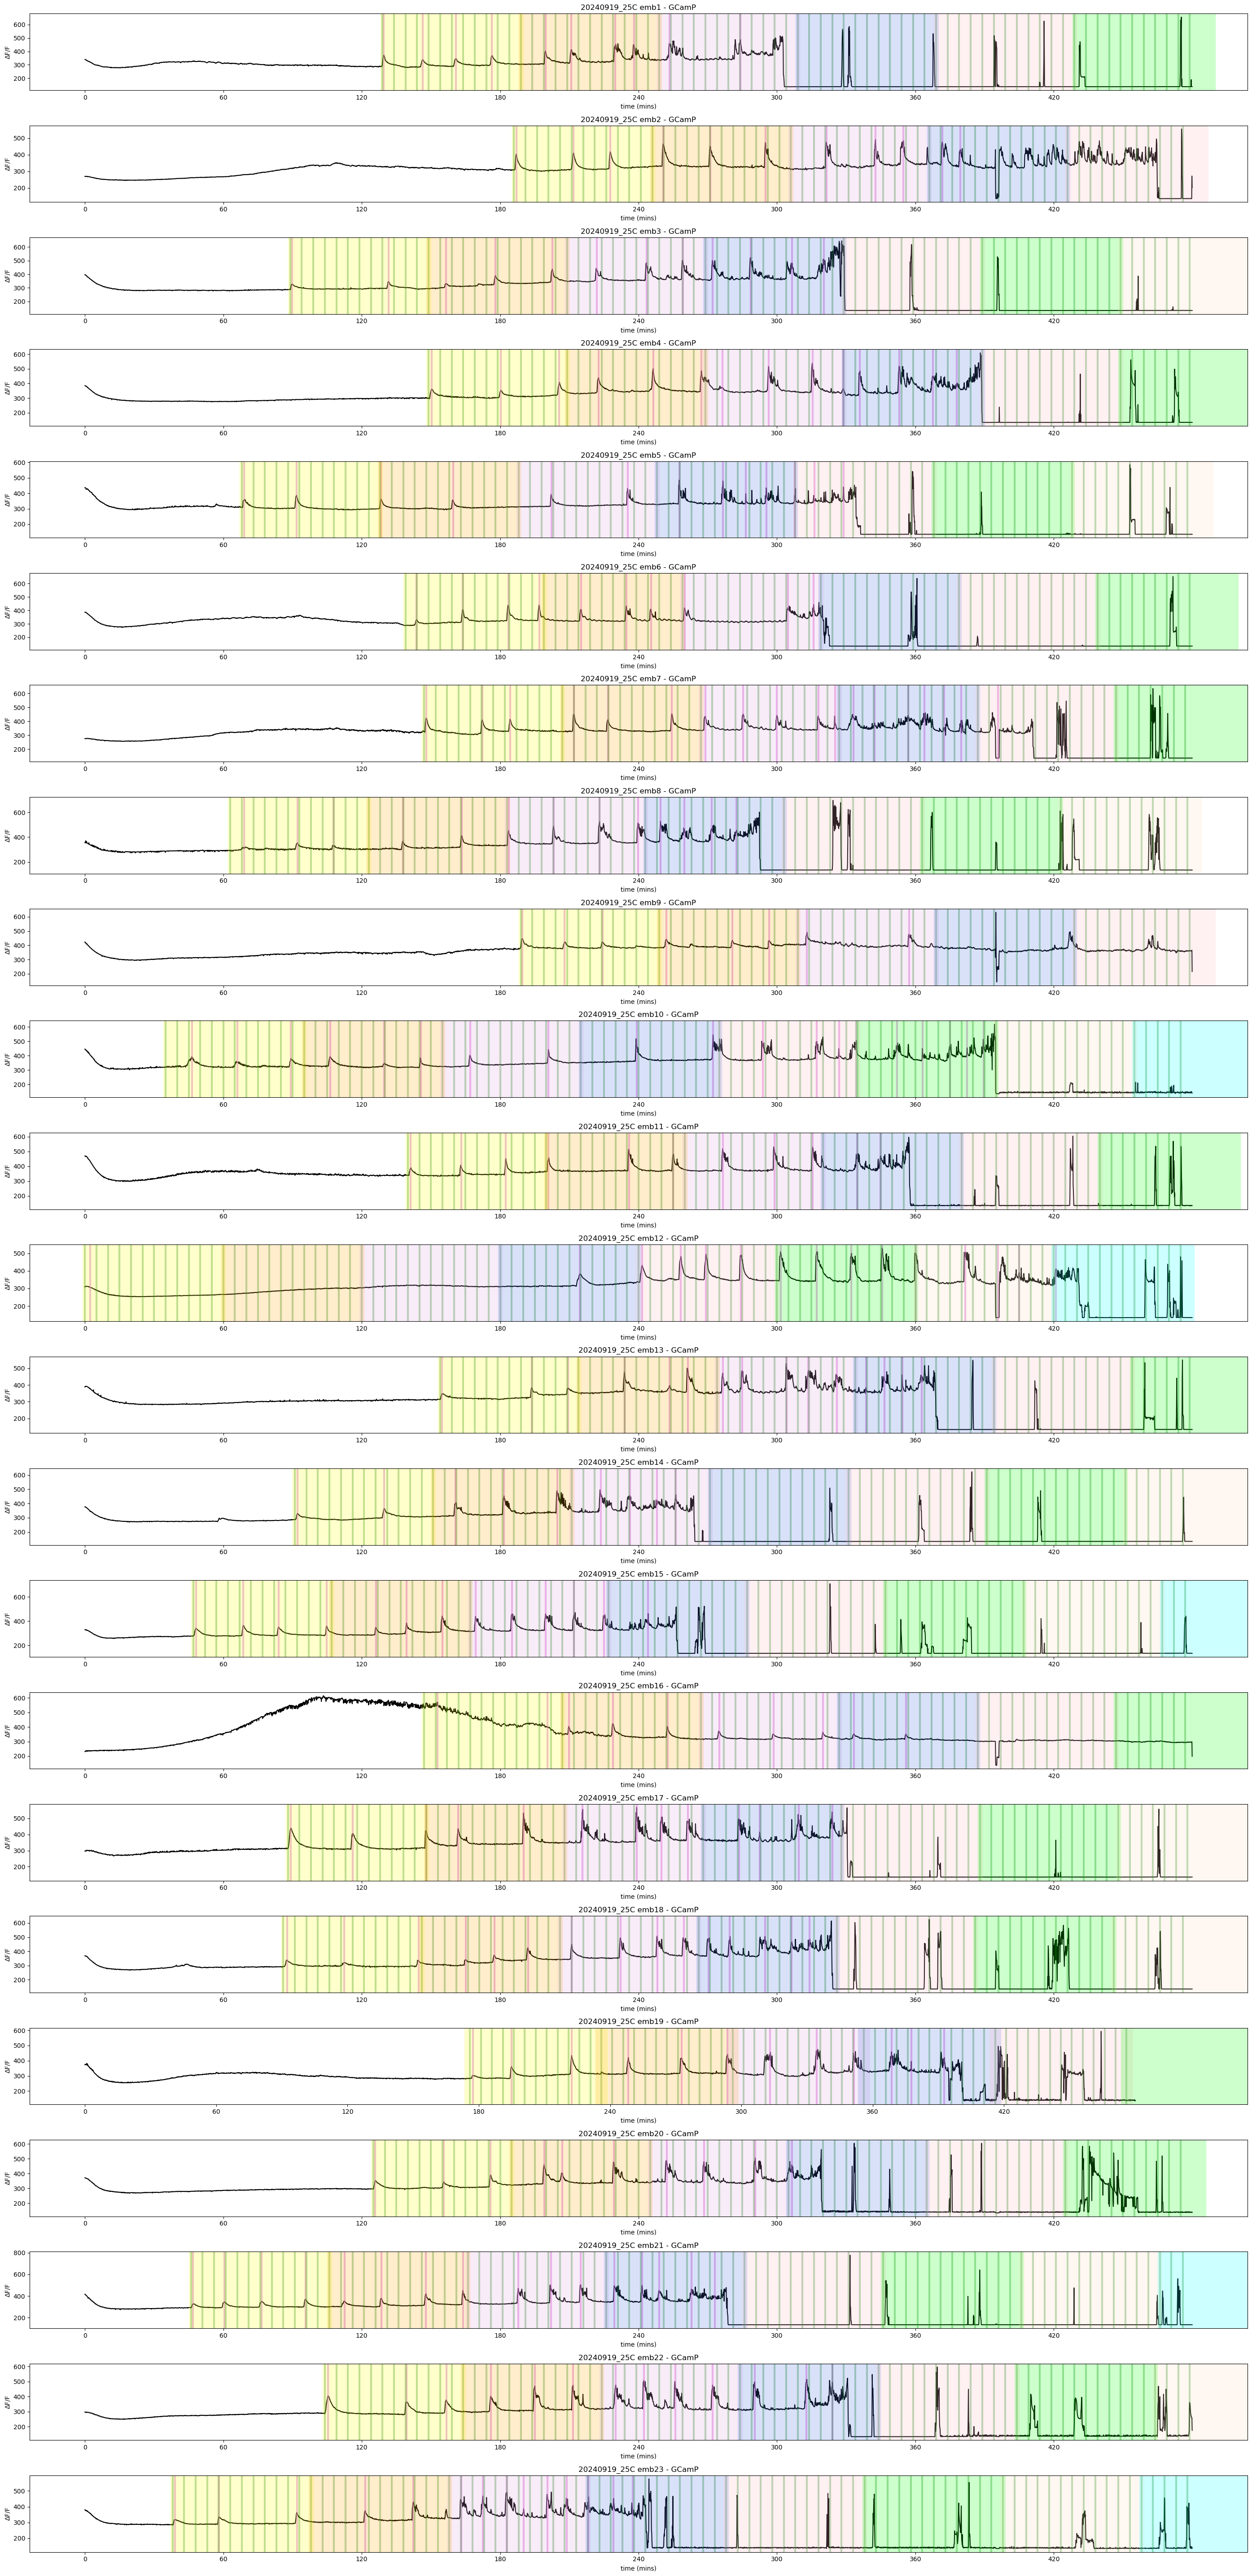

In [3]:
'''Plots activity signals for a group of embryos. Color code blocks of time'''
# Change start and end to select different groups
start = 0
end = len(exp.embryos)

fig, axes = plt.subplots(end-start, figsize=(28, 2.5*(end-start)))

for ax, emb in zip(axes, exp.embryos[start:end]):
    # plot data
    time = emb.activity[:, 0] / 60
    trace = exp.traces[emb.name]
    ax.plot(time, trace.active, color='black')

    # set title/labels
    ax.set_title(f'{exp.name} {emb.name} - GCamP')
    ax.set_ylabel('ΔF/F')
    ax.set_xlabel('time (mins)')

    # set tick marks
    x_points = utils.time_scale_list(max(time))
    ax.set_xticks(x_points)

    # mark identified bursts
    for peak in trace.peak_times:
        peak_in_mins = peak / 60
        ax.axvline(peak_in_mins, color='orchid', alpha=0.5, linewidth=3)

    # add 5 min lines after the start of activity
    start = round(time[trace.peak_bounds_indices[0][0]])
    five_mins = np.arange(start, max(time), 5)
    for line in five_mins:
        ax.axvline(line, linewidth=3, color='green', alpha=0.3)
    
    # add hour blocks
    hours = np.arange(start, max(time), 60)
    colors = ['yellow', 'orange', 'plum', 'royalblue', 'lightpink', 'lime', 'peachpuff', 'aqua', 'tomato']
    color_hour = zip(hours, colors[0:len(hours)])
    for hour, c in color_hour:
        ax.axvline(hour+30, color=c, linewidth=230, alpha=0.2) # adjust line width to control color block size

plt.tight_layout()

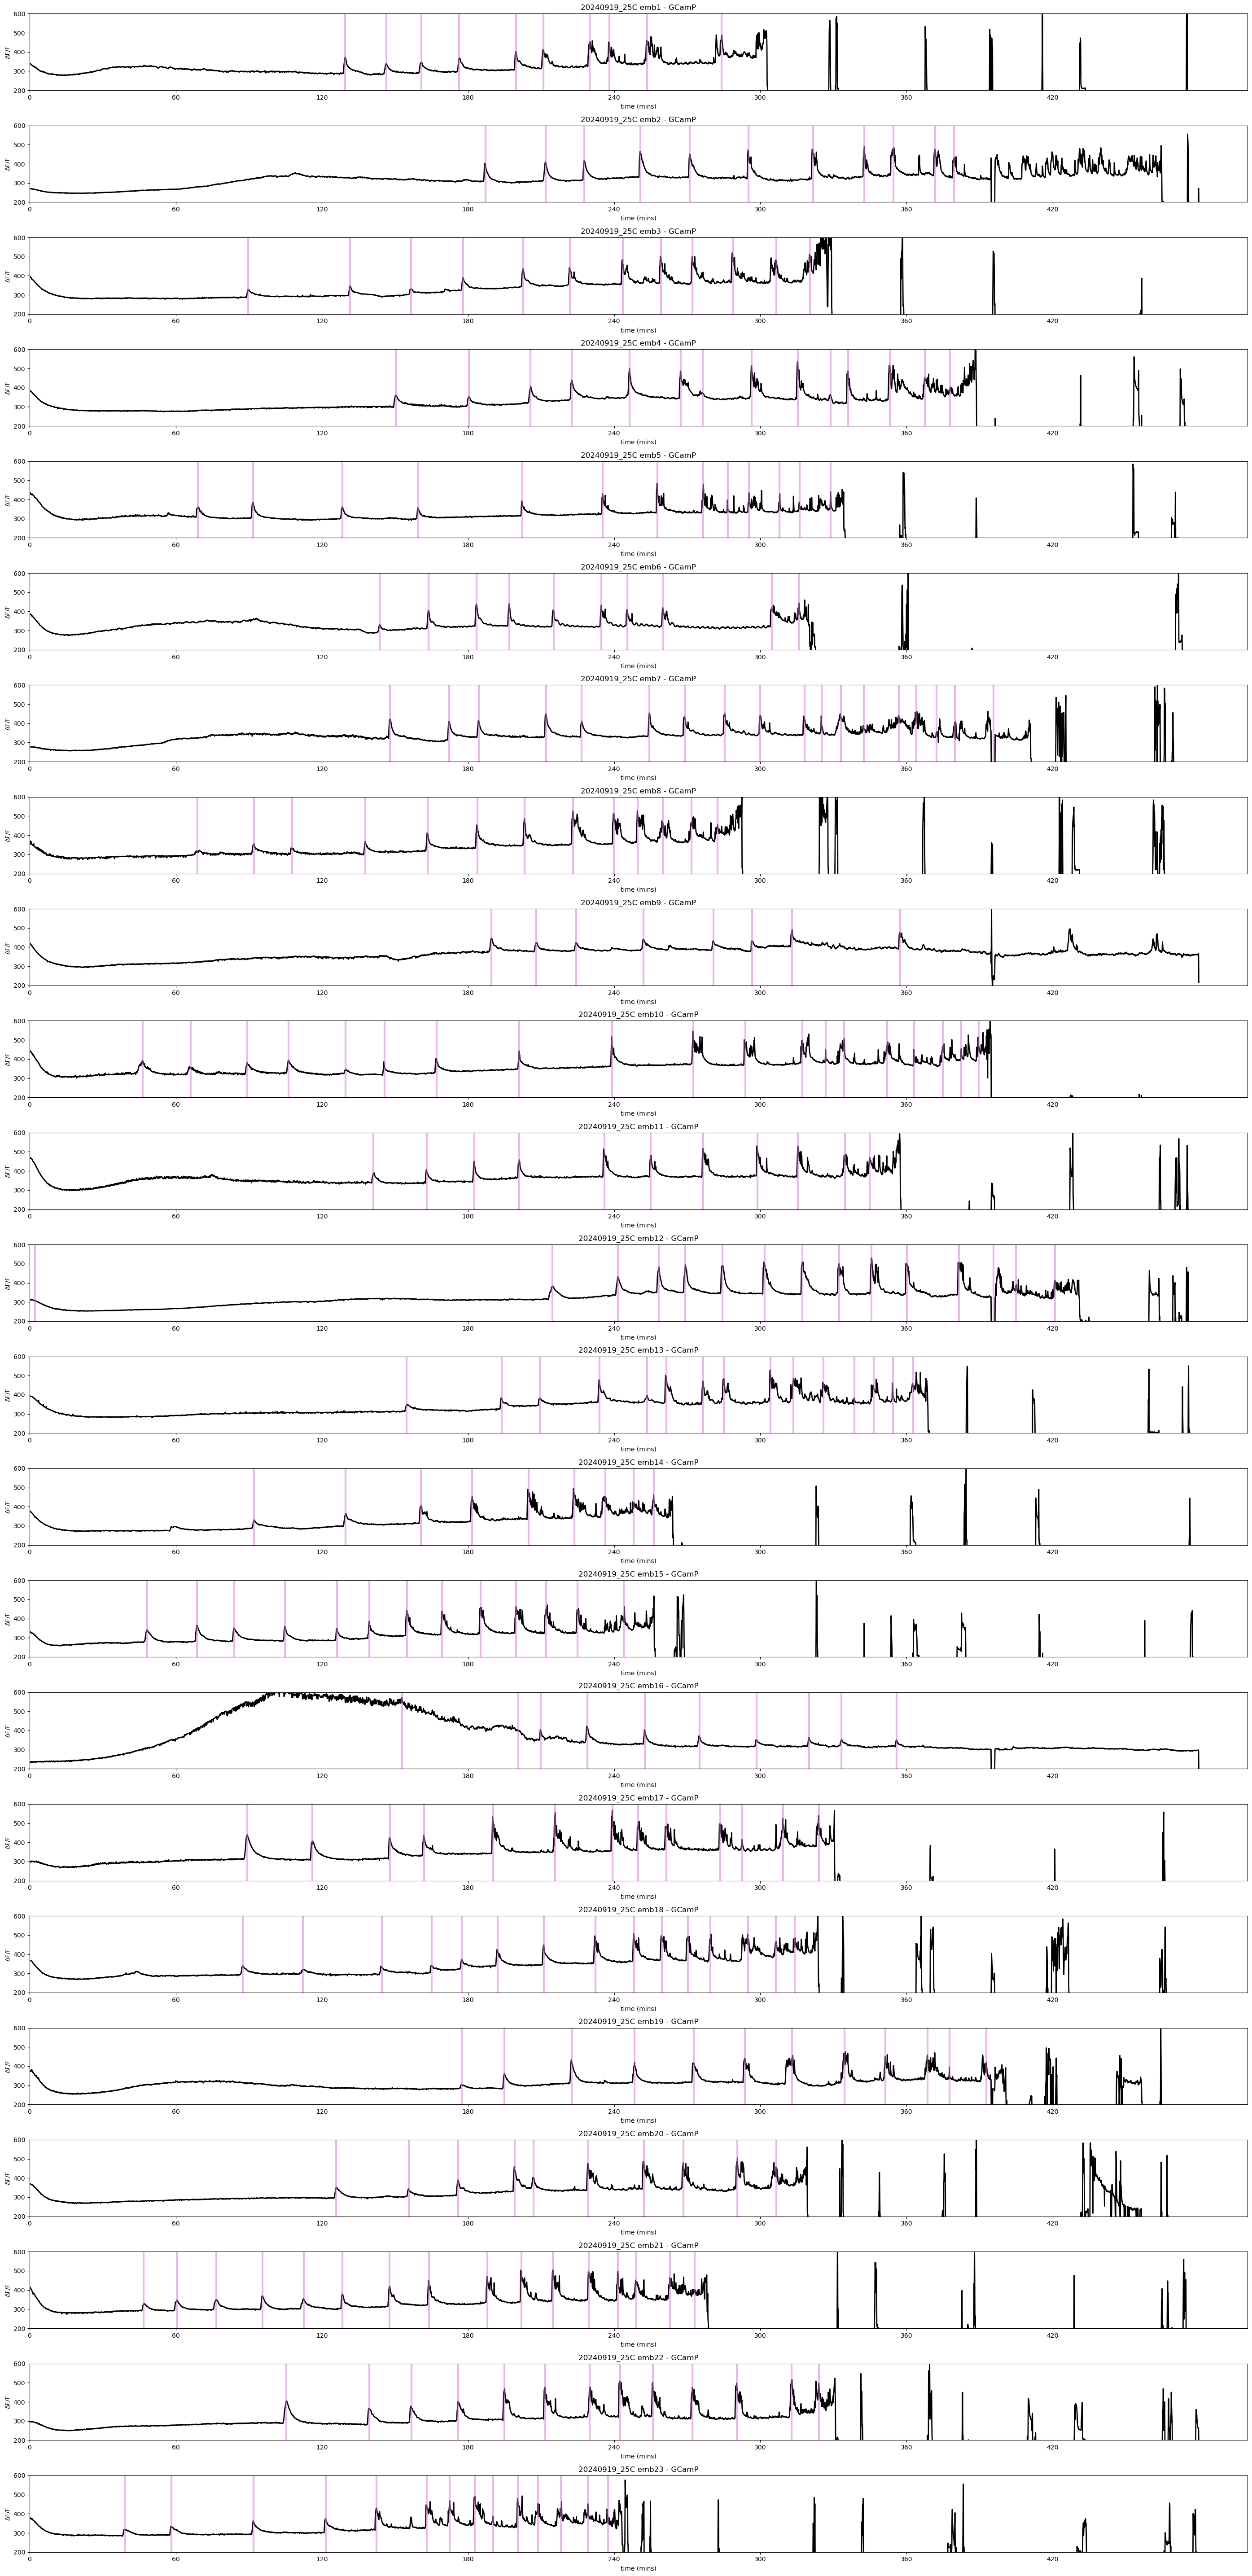

In [5]:
'''Plots activity signals for a group of embryos.'''
# Change start and end to select different groups
start = 0
end = len(exp.embryos)

fig, axes = plt.subplots(end-start, figsize=(28, 2.5*(end-start)))

for ax, emb in zip(axes, exp.embryos[start:end]):
    # plot data
    time = emb.activity[:, 0] / 60
    trace = exp.traces[emb.name]
    ax.plot(time, trace.active, color='black', linewidth=2)

    # set title & labels
    ax.set_title(f'{exp.name} {emb.name} - GCamP')
    ax.set_ylabel('ΔF/F')
    ax.set_xlabel('time (mins)')

    # set tick marks
    x_points = utils.time_scale_list(max(time))
    ax.set_xticks(x_points)
    
    # trim x and y axis
    ax.set_xlim([0, 500])
    ax.set_ylim([200,600])

    # mark identified bursts
    for peak in trace.peak_times:
        peak_in_mins = peak / 60
        ax.axvline(peak_in_mins, color='orchid', alpha=0.5, linewidth=3)

plt.tight_layout()

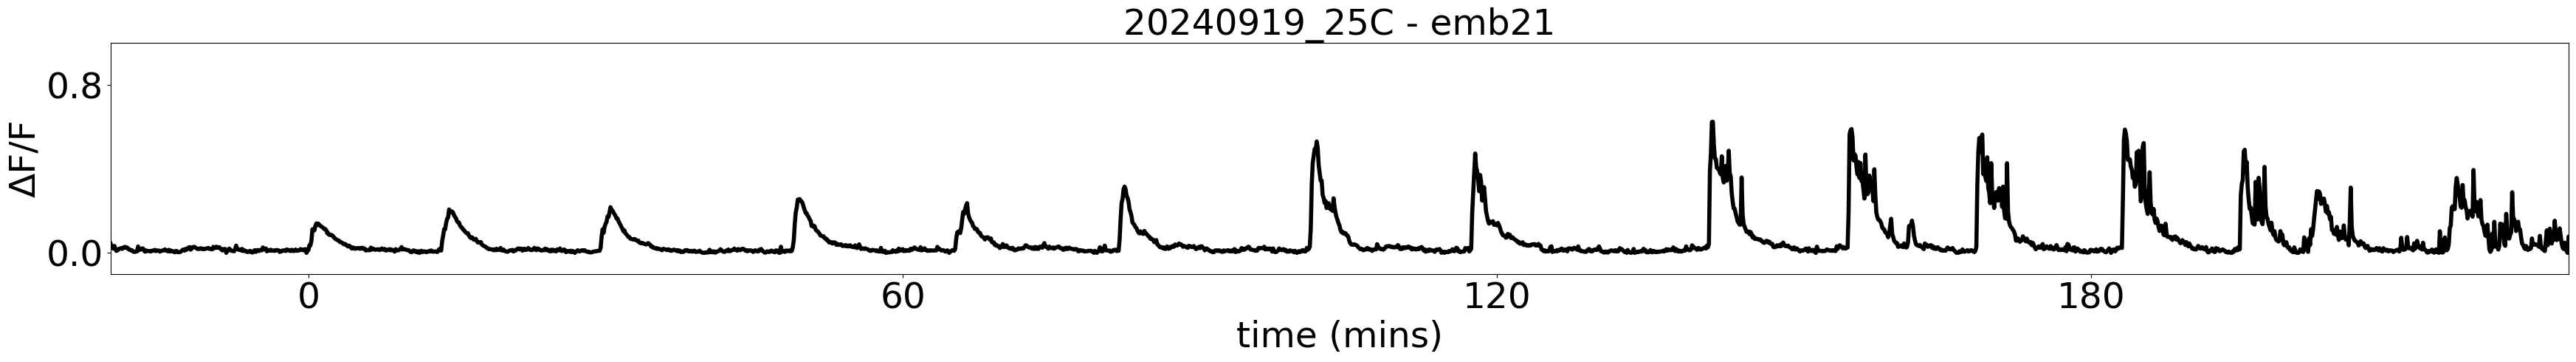

In [9]:
"""Generate single dff trace"""

# get data
emb = exp.embryos[20] # choose emb
time = emb.activity[:, 0] / 60
trace = exp.traces[emb.name]

# plot trace
fig, ax = plt.subplots(figsize=(35, 5))
ax.plot(time, trace.dff, color='black', linewidth=4)


# set title/labels
fontsize = 35
ax.tick_params(axis='both', which='major', labelsize=fontsize)

ax.set_title(f'{exp.name} - {emb.name}', fontsize=fontsize)
ax.set_ylabel('ΔF/F', fontsize=fontsize)
ax.set_xlabel('time (mins)', fontsize=fontsize)

# x axis - trim to before onset & at hatching
start = round(time[trace.peak_bounds_indices[0][0]])
end_time = trace.time[trace.trim_idx]/60
ax.set_xlim(start - 20, end_time) # start plotting 20 mins before hatching

# x axis - adjust tick labels to make the start time 0
ax.set_xticks([start, start+60, start+120, start+180])
ax.set_xticklabels([0, 60, 120, 180])

# y axis - trim & tick labels
ax.set_ylim(-0.1, 1)
ax.set_yticks([0, 0.8])

plt.tight_layout()

# plt.savefig('test.svg')

294 294 294


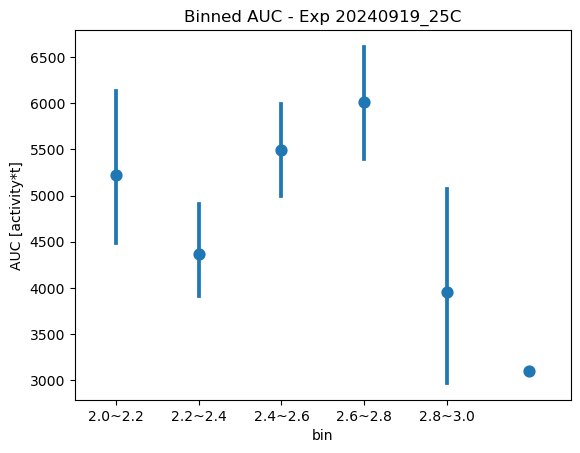

In [40]:
'''Plots AUC, grouped by bins.'''
data = {'auc': [], 'bin': [], 'emb': []}

n_bins = 5
first_bin = 2
bin_width = 0.2
for i, emb in enumerate(exp.embryos):
    trace = exp.traces[emb.name]

    dev_time_at_peaks = emb.get_DT_from_time(trace.peak_times)

    bins = [first_bin + j*bin_width for j in range(n_bins)]
    bin_idxs = utils.split_in_bins(dev_time_at_peaks, bins)
    data['auc'].extend(trace.peak_aucs)
    data['bin'].extend(bin_idxs)
    data['emb'].extend([str(i)]*len(trace.peak_aucs))

print(len(data['auc']), len(data['bin']), len(data['emb']))

# add a last bin point to generate the labels
bins.append(first_bin + bin_width*n_bins)
x_labels = [f"{s}~{e}" for (s, e) in zip(bins[:-1], bins[1:])]
ax = sns.pointplot(data=data, x='bin', y='auc', linestyle='None')
ax.set_xticks(ticks=list(range(n_bins)), labels=x_labels)
ax.set_title(f'Binned AUC - Exp {exp.name}')
ax.set_ylabel('AUC [activity*t]');

In [ ]:
'''Plot peak times for all embryos. This should help to isolate the 
early peaks.'''
UPPER_LIMIT = 15000
times = []
for emb in exp.embryos:
    trace = exp.traces[emb.name]
    times.append([t/60 for t in trace.peak_times if t < 15000])

fig, ax = plt.subplots()
for i, time in enumerate(times):
    ax.plot(time, [i]*len(time), marker='.', linestyle='dashed', 
            linewidth=0.5)

ax.vlines(30, 0, len(exp.embryos), color='k', linewidth=0.3)
ax.set_title(f'Peak times for exp {exp.name}')
x_points = utils.time_scale_list(UPPER_LIMIT/60)
ax.set_xticks(x_points)
ax.set_xlabel('time (mins)')
ax.set_ylabel('emb')
ax.set_yticks([])

In [ ]:
'''Compare first interspike interval and average interspike interval'''
import numpy as np

avg_ISIs = []
first_ISIs = []
for emb in exp.embryos:
    trace = exp.traces[emb.name]
    peak_times = trace.peak_times
    avg_ISIs.append(np.average(np.diff(peak_times[1:])))
    first_ISIs.append(peak_times[1] - peak_times[0])

max_val = np.max((np.max(avg_ISIs), np.max(first_ISIs)))
diag = list(range(0, int(max_val), 50))

fig, ax = plt.subplots()
ax.plot(avg_ISIs, first_ISIs, 'k.')
ax.plot(diag, diag, label='y=x')
ax.plot(diag, list(range(0, int(max_val)*2, 50*2)), label='y=2*x')
ax.set_xlabel('average ISI')
ax.set_ylabel('first ISI')
ax.set_xlim(0, max_val)
ax.set_ylim(0, max_val)
ax.set_title(f'Differences between first and avg intervals - exp {exp.name}')
ax.legend();

In [ ]:
"""Plot PSD spectrum for an embryo"""

start = 0
end = len(exp.embryos)

fig, axes = plt.subplots(end-start, figsize=(35, 3*(end-start)))
axes = axes.flatten()
for ax, emb in zip(axes, exp.embryos[start:end]):

    trace = exp.traces[emb.name]
    dff = trace.dff

    fs = 1/6 

    finite = np.isfinite(dff)
    finite_dff = dff[finite]
    
    ax.set_title(f'{exp.name} {emb.name} - GCamP')
    freqs, amps = spsig.welch(finite_dff, fs=1/6, window='hamming', nperseg=1024, scaling='spectrum')
    ax.plot(freqs, amps)
    ax.set(xlim=(0, 0.015))

In [ ]:
"""Count mini peaks"""
emb = exp.embryos[1]

trace = exp.traces[emb.name]
dff = trace.dff

fig, ax = plt.subplots(figsize=(20, 3))

# find mini peaks
time = emb.activity[:, 0] / 60
minipeak_indices, properties = spsig.find_peaks(dff, prominence=0.05)
minipeak_times = [time[x] for x in minipeak_indices]
for peak in minipeak_times:
    ax.axvline(peak, color='purple', alpha=0.05, linewidth=10)
x_points = utils.time_scale_list(max(time))

# count mini peaks per hour
# onset = trace.peak_times[0]/60
# every_hour = np.arange(onset, max(time), 60)
# peak_per_hour = {'1':0, '2':0, '3':0, '4':0, '5':0, '6':0, '7':0, '8':0, '9':0}
# for peak in minipeaks_times:
#     for hour in every_hour:
        

plt.plot(time, dff)

In [ ]:
'''Local peaks for each peak.'''
data = {'num_local_peaks': [], 'peak': [], 'emb': []}

for emb in exp.embryos:
    trace = exp.traces[emb.name]
    local_peaks = trace.compute_local_peaks(height=0.03, prominence=0.02)
    for i, lp in enumerate(local_peaks):
        data['num_local_peaks'].append(lp) 
        data['peak'].append(str(i)) 
        data['emb'].append(emb.name)

ax = sns.pointplot(data=data, x='peak', y='num_local_peaks', linestyle='None')
ax.set_title('Local peaks for each peak')
ax.set_ylabel('Number of local peaks')
ax.set_xlabel('Peak number');

In [ ]:
'''Local peak rate.'''
i = 5
split_idx = 1250

fig, ax = plt.subplots()

emb = exp.embryos[i]
time = emb.activity[:, 0] / 60
x_points = utils.time_scale_list(max(time))
trace = exp.traces[emb.name]
ax.set_title(f'{emb.name} - dff')
ax.set_ylabel('ΔF/F')
ax.set_xlabel('time (mins)')
ax.set_xticks(x_points)
ax.plot(time, trace.dff)

left, right = trace.compute_all_local_peaks(split_idx, height=0.02, prominence=0.02)
first_peak_idx = trace.peak_idxes[0]
first_peak_time = trace.time[first_peak_idx]
split_time = trace.time[split_idx]
end_time = trace.time[trace.trim_idx]
print(left/(split_time - first_peak_time), right/(end_time-split_time))

ax.axvline(first_peak_time/60, color='g', alpha=0.8)
ax.axvline(split_time/60, color='k', alpha=0.8)
ax.axvline(end_time/60, color='r', alpha=0.8)

plt.tight_layout()

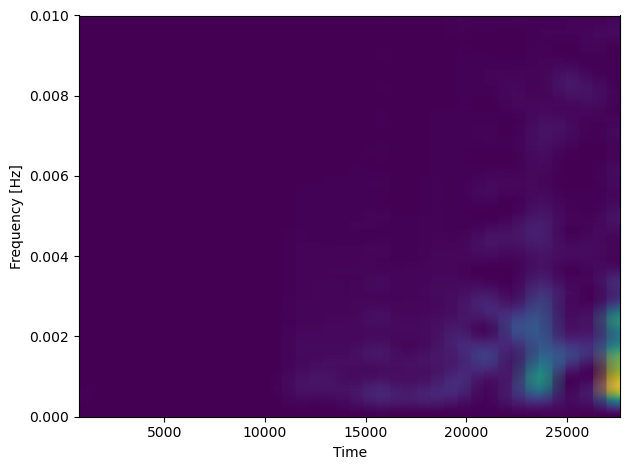

In [2]:
"""Quantifying Frequency"""

'''spectrogram'''
emb = exp.embryos[1]
time = emb.activity[:, 0] / 60
x_points = utils.time_scale_list(max(time))
trace = exp.traces[emb.name]
freqs, times, spectrogram = spsig.spectrogram(trace.dff, 1/6, nfft=16384)
plt.pcolormesh(times, freqs, spectrogram, shading = 'gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time')
plt.ylim((0, 0.01))
plt.tight_layout()